In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0, 1, 2])  # Adjust columns as needed
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\BIT\AppData\Local\Temp\ipykernel_24480\3431972855.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Alcohol'], shade=True)


<Axes: xlabel='Alcohol', ylabel='Density'>

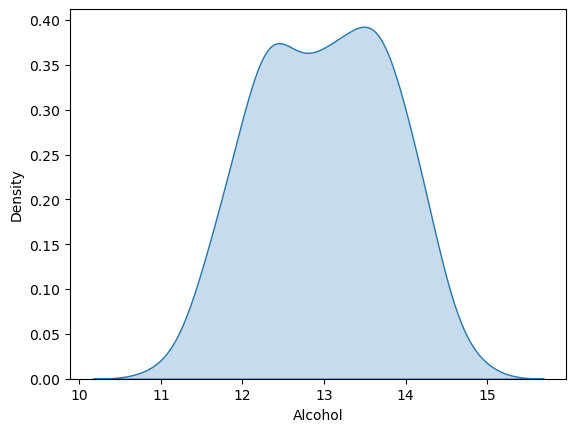

In [16]:
sns.kdeplot(df['Alcohol'], shade=True)

<Axes: xlabel='Malic acid', ylabel='Density'>

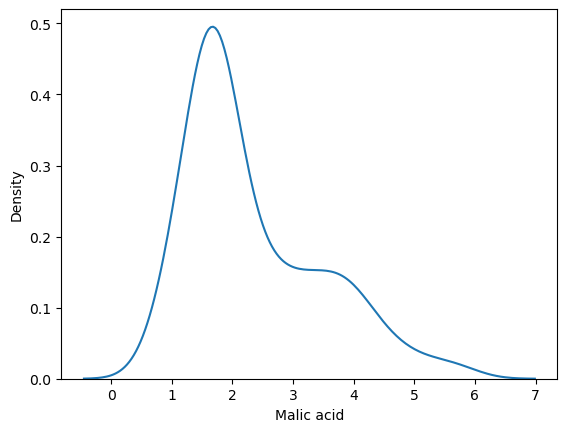

In [17]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

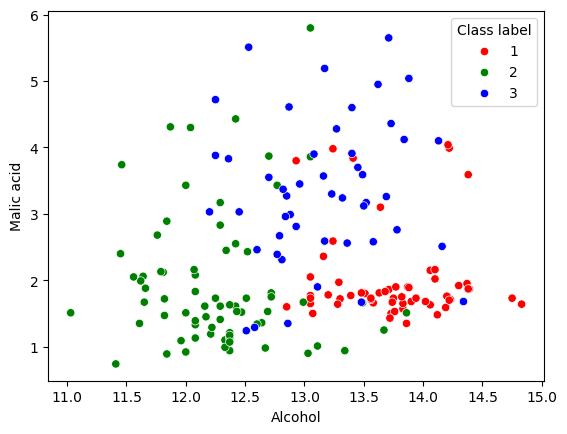

In [18]:
color_dict = {1: 'red', 2: 'green', 3: 'blue'}
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label', palette=color_dict)

In [19]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size = 0.3,random_state = 0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fix the scalar to the train set, it will learn the parameters
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [21]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [22]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


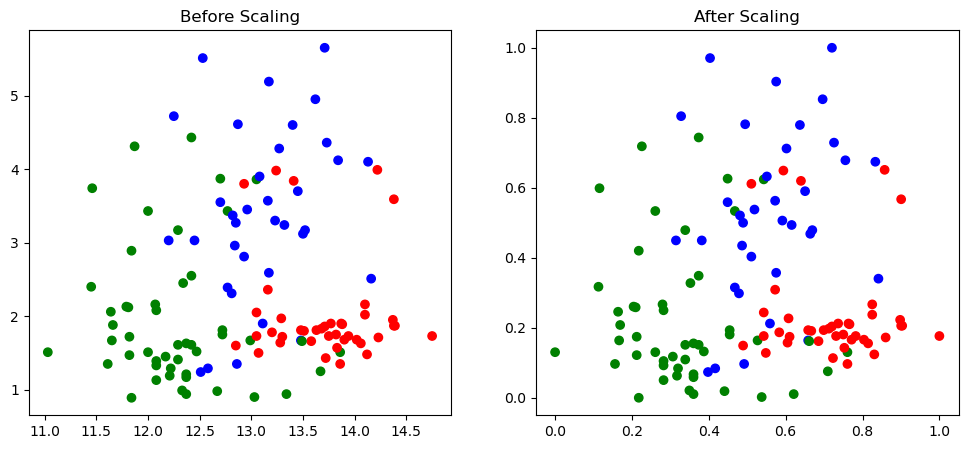

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train.map(color_dict))
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train.map(color_dict))
ax2.set_title('After Scaling')
plt.show()

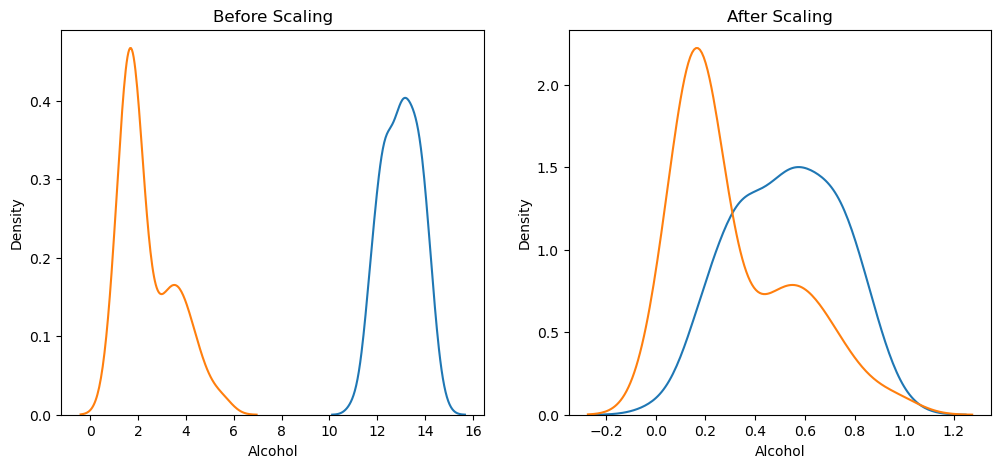

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

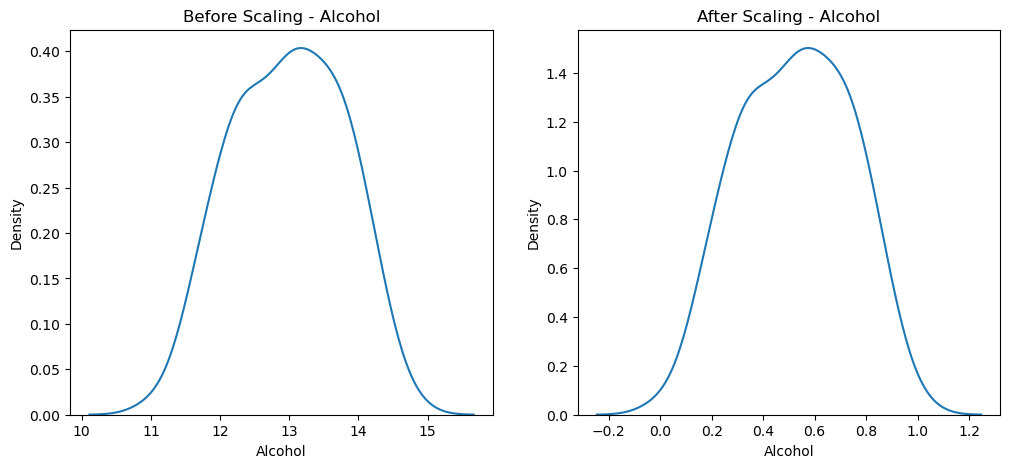

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling alcohol
sns.kdeplot(X_train['Alcohol'], ax=ax1)
ax1.set_title('Before Scaling - Alcohol')

#after scaling alcohol
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
ax2.set_title('After Scaling - Alcohol')
plt.show()

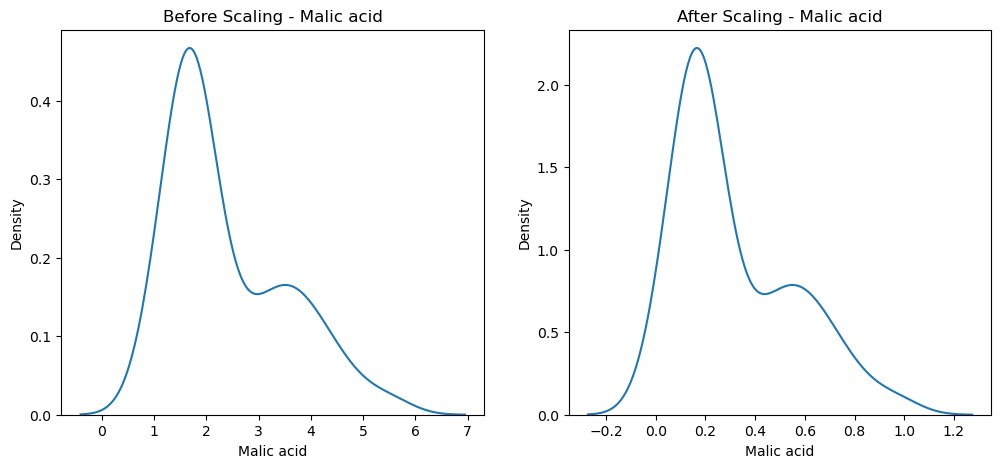

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling alcohol
sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax1.set_title('Before Scaling - Malic acid')

#after scaling alcohol
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
ax2.set_title('After Scaling - Malic acid')
plt.show()